In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
raw_data_X = [[3.393533211,2.331273381],
              [3.110073483,1.781539638],
              [1.343808831,3.368360954],
              [3.582294042,4.679179110],
              [2.280362439,2.866990263],
              [7.423436942,4.696522875],
              [5.745051997,3.533989803],
              [9.172168622,2.511101045],
              [7.792783481,3.424088941],
              [7.939820817,0.791637231]
            ]
raw_data_y = [0,0,0,0,0,1,1,1,1,1] #0 良性，1 恶性

In [50]:
X_train = np.array(raw_data_X)
y_train = np.array(raw_data_y)

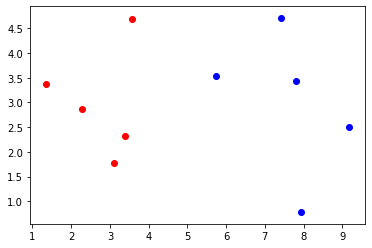

In [14]:
plt.scatter(X_train[y_train==0,0],X_train[y_train==0,1],color="red")
plt.scatter(X_train[y_train==1,0],X_train[y_train==1,1],color="blue")
plt.show()

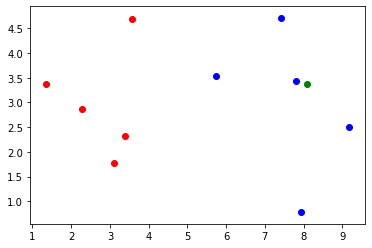

In [16]:
x = np.array([8.093607318,3.365731514])  # 假设一个新点
plt.scatter(X_train[y_train==0,0],X_train[y_train==0,1],color="red")
plt.scatter(X_train[y_train==1,0],X_train[y_train==1,1],color="blue")
plt.scatter(x[0],x[1],color='g')
plt.show()

### kNN过程

In [39]:
from math import sqrt
distances = []
for x_train in X_train:
    d = sqrt(np.sum((x_train - x)**2))
    distances.append(d)
print(distances)

[4.812566907609877, 5.229270827235305, 6.749798999160064, 4.6986266144110695, 5.83460014556857, 1.4900114024329525, 2.354574897431513, 1.3761132675144652, 0.3064319992975, 2.5786840957478887]


In [24]:
nearest = np.argsort(distances) #返回排序后索引的下标
k=6
topK_y = [y_train[i] for i in nearest[:k]] #最近的k个点的 y 值
print(topK_y)

[1, 1, 1, 1, 1, 0]


In [29]:
from collections import Counter
votes = Counter(topK_y) # 计算元素出现的次数

In [32]:
print(votes.most_common(1)) # 最多前 1 个元素
print(votes.most_common(1)[0]) 
print(votes.most_common(1)[0][0]) #结果 
predict_y = votes.most_common(1)[0][0]

[(1, 5)]
(1, 5)
1


In [33]:
predict_y  # 预测值

1

### kNN简单封装

In [34]:
import numpy as np
from math import sqrt
from collections import Counter


def kNN_classify(k,X_train,y_train, x):
    
    assert 1<=k<=X_train.shape[0], "k must be valid"
    assert X_train.shape[0] == y_train.shape[0], \
        "the size of X_train must be equal to the size of y_train"
    assert X_train.shape[1] == x.shape[0], \
        "the feature number of x must be equal to X_train"
    
    distances = [sqrt(np.sum((x_train - x))**2) for x_train in X_train]
    nearest = np.argsort(distances)
    topK_y = [y_train[i] for i in nearest[:k]]
    votes = Counter(topK_y)
    
    return votes.most_common(1)[0][0]

In [52]:
print(X_train)
predict = kNN_classify(6,X_train,y_train, x)
print(predict)

[[3.39353321 2.33127338]
 [3.11007348 1.78153964]
 [1.34380883 3.36836095]
 [3.58229404 4.67917911]
 [2.28036244 2.86699026]
 [7.42343694 4.69652288]
 [5.745052   3.5339898 ]
 [9.17216862 2.51110105]
 [7.79278348 3.42408894]
 [7.93982082 0.79163723]]
1


### 使用scikit-learn中的kNN

In [41]:
from sklearn.neighbors import  KNeighborsClassifier

In [42]:
kNN_classifier = KNeighborsClassifier(n_neighbors = 6)

In [54]:
kNN_classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [60]:
x = x.reshape(1,-1)
print(kNN_classifier.predict(x))  # 统一接口，传入的 x 要用矩阵包装
print(kNN_classifier.predict(x)[0]) # 第0个样本的特征预测结果？？？？

[1]
1


### kNN完整封装

In [82]:
import numpy as np
from math import sqrt
from collections import Counter

class KNNClassifier:
    
    def __init__(self,k):
        """初始化kNN分类器"""
        assert k>=1, "k must be valid"
        self.k = k
        self._X_train = None
        self._y_train = None
        
    def fit(self, X_train, y_train):
        """根据训练数据集X_train和y_train训练kNN分类器"""
        assert X_train.shape[0] == y_train.shape[0], \
            "the size of X_train must be equal to the size of y_train"
        assert self.k <= X_train.shape[0], \
            "the feature number of x must be equal to X_train"
    
        self._X_train = X_train
        self._y_train = y_train
        return self
    
    def predict(self, X_predict):
        """给定待预测数据集X_predict,返回表示X_predict的结果向量"""
        assert self._X_train is not None and self._y_train is not None, \
            "must fit before predict!"
        assert X_predict.shape[1] == self._X_train.shape[1], \
            "the feature number of X_prediect must be equal to X_train"
        
        y_predict = [self._predict(x) for x in X_predict]
        return np.array(y_predict)
    
    def _predict(self,x):
        """给定单个带预测数据x，返回x的预测结果值"""
        assert x.shape[0] == self._X_train.shape[1], \
            "the feature number of x must be equal to X_train"
        
        distances = [sqrt(np.sum((x_train - x))**2) for x_train in self._X_train]
        nearest = np.argsort(distances)
        
        topK_y = [self._y_train[i] for i in nearest[:self.k]]
        votes = Counter(topK_y)
    
        return votes.most_common(1)[0][0]
    
    def __repr__(self):
        return "KNN(k=%d)" % self.k

In [83]:
knn_clf = KNNClassifier(k=6)

In [84]:
knn_clf.fit(X_train,y_train)

KNN(k=6)

In [86]:
x_pred = x
y_predict = knn_clf.predict(x_pred)
print(y_predict)
print(y_predict[0])

[1]
1


### 参数，网格搜索(knn进阶、完整sklearn.knn总结)

In [1]:
import numpy as np
from sklearn import datasets

In [2]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=666) #random_state=666 种子

In [4]:
from sklearn.neighbors import KNeighborsClassifier

sk_knn_clf = KNeighborsClassifier(n_neighbors=4,weights="uniform")
sk_knn_clf.fit(X_train,y_train) # 训练模型

print(sk_knn_clf.predict(X_test)) # 预测过程
print(sk_knn_clf.score(X_test,y_test)) # 准确率(内部包含预测过程)

[8 1 3 4 4 0 7 0 8 0 4 6 1 1 2 0 1 6 7 3 3 6 3 2 3 4 0 2 0 3 0 8 7 2 3 5 1
 3 1 5 8 6 2 6 3 1 3 0 0 4 9 9 2 8 7 0 5 4 0 9 5 5 8 7 4 2 8 8 7 1 4 3 0 2
 7 2 1 2 4 0 9 0 6 6 2 0 0 5 4 4 3 1 3 8 6 4 4 7 5 6 8 4 8 4 6 9 7 7 0 8 8
 3 9 7 1 8 4 2 7 0 0 4 9 6 7 3 4 6 4 8 4 7 2 6 9 5 8 7 2 5 5 9 7 9 3 1 9 4
 4 1 5 1 6 4 4 8 1 6 2 5 2 1 4 4 3 9 4 0 6 0 8 3 8 7 3 0 3 0 5 9 2 7 1 8 1
 4 3 3 7 8 2 7 2 2 8 0 5 7 6 7 3 4 7 1 7 0 9 2 8 9 3 8 9 1 1 1 9 8 8 0 3 7
 3 3 4 8 2 1 8 6 0 1 7 7 5 8 3 8 7 6 8 4 2 6 2 3 7 4 9 3 5 0 6 3 8 3 3 1 4
 5 3 2 5 6 8 6 9 5 5 3 6 5 9 3 7 7 0 2 4 9 9 9 2 5 6 1 9 6 9 7 7 4 5 0 0 5
 3 8 4 4 3 2 5 3 2 2 3 0 9 8 2 1 4 0 6 2 8 0 6 4 9 9 8 3 9 8 6 3 2 7 9 4 2
 7 5 1 1 6 1 0 4 5 2 9 0 3 3 0 7 4 8 5 9 5 9 5 0 7 9 8]
0.9916666666666667


In [5]:
# Grid Search
# 由于knn不止一个k这个参数，还有距离是否有权重weight，明可夫斯基距离的p等等
# weight=uniform时，代表没有权重，所以不需要改动p(p默认为2); 当weight=distance时,才会改动p
# 所以网格需要分类

param_grid = [
    {
        'weights':['uniform'],
        'n_neighbors':[i for i in range(1,11)]
    },
    {
        'weights':['distance'],
        'n_neighbors':[i for i in range(1,11)],
        'p':[i for i in range(1,6)]
    }
]

In [6]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()

In [7]:
# 网格搜索
# GridSearchCV是一个类

from sklearn.model_selection import GridSearchCV  

grid_search = GridSearchCV(knn_clf, param_grid)

In [8]:
%%time
grid_search.fit(X_train,y_train)

E:\anaconda3.7\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Wall time: 1min 7s


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'weights': ['uniform']},
                         {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'p': [1, 2, 3, 4, 5], 'weights': ['distance']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [9]:
# best_estimator_ 变量表示网格搜索最优解对应的对象
# 变量后+ ‘_’ 表示该变量不是由用户直接传入，而是根据....获得的变量

grid_search.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=3,
                     weights='distance')

In [10]:
grid_search.best_score_

0.9853862212943633

In [11]:
grid_search.best_params_

{'n_neighbors': 3, 'p': 3, 'weights': 'distance'}

In [12]:
knn_clf = grid_search.best_estimator_    # **************

In [13]:
knn_clf.predict(X_test)

array([8, 1, 3, 4, 4, 0, 7, 0, 8, 0, 4, 6, 1, 1, 2, 0, 1, 6, 7, 3, 3, 6,
       5, 2, 9, 4, 0, 2, 0, 3, 0, 8, 7, 2, 3, 5, 1, 3, 1, 5, 8, 6, 2, 6,
       3, 1, 3, 0, 0, 4, 9, 9, 2, 8, 7, 0, 5, 4, 0, 9, 5, 5, 8, 7, 4, 2,
       8, 8, 7, 5, 4, 3, 0, 2, 7, 2, 1, 2, 4, 0, 9, 0, 6, 6, 2, 0, 0, 5,
       4, 4, 3, 1, 3, 8, 6, 4, 4, 7, 5, 6, 8, 4, 8, 4, 6, 9, 7, 7, 0, 8,
       8, 3, 9, 7, 1, 8, 4, 2, 7, 0, 0, 4, 9, 6, 7, 3, 4, 6, 4, 8, 4, 7,
       2, 6, 9, 5, 8, 7, 2, 5, 5, 9, 7, 9, 3, 1, 9, 4, 4, 1, 5, 1, 6, 4,
       4, 8, 1, 6, 2, 5, 2, 1, 4, 4, 3, 9, 4, 0, 6, 0, 8, 3, 8, 7, 3, 0,
       3, 0, 5, 9, 2, 7, 1, 8, 1, 4, 3, 3, 7, 8, 2, 7, 2, 2, 8, 0, 5, 7,
       6, 7, 3, 4, 7, 1, 7, 0, 9, 2, 8, 9, 3, 8, 9, 1, 1, 1, 9, 8, 8, 0,
       3, 7, 3, 3, 4, 8, 2, 1, 8, 6, 0, 1, 7, 7, 5, 8, 3, 8, 7, 6, 8, 4,
       2, 6, 2, 3, 7, 4, 9, 3, 5, 0, 6, 3, 8, 3, 3, 1, 4, 5, 3, 2, 5, 6,
       9, 6, 9, 5, 5, 3, 6, 5, 9, 3, 7, 7, 0, 2, 4, 9, 9, 9, 2, 5, 6, 1,
       9, 6, 9, 7, 7, 4, 5, 0, 0, 5, 3, 8, 4, 4, 3,

In [14]:
knn_clf.score(X_test,y_test)

0.9833333333333333

In [19]:
### 完成，另外可以尝试搜索时 一边搜索一边输出
knn_clf = KNeighborsClassifier() #貌似可以不需要这句话

In [23]:
%%time
grid_search2 = GridSearchCV(knn_clf, param_grid, n_jobs=None, verbose=2)  # n_jobs 代表有几个核,-1代表有几个用几个，这里我的电脑貌似检测不出来n_job
                                                                       # verbose 代表边运行边输出信息，数值越大，输出信息越详细
grid_search2.fit(X_train, y_train)

E:\anaconda3.7\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 60 candidates, totalling 180 fits
[CV] n_neighbors=1, weights=uniform ..................................
[CV] ................... n_neighbors=1, weights=uniform, total=   0.1s
[CV] n_neighbors=1, weights=uniform ..................................
[CV] ................... n_neighbors=1, weights=uniform, total=   0.0s
[CV] n_neighbors=1, weights=uniform ..................................
[CV] ................... n_neighbors=1, weights=uniform, total=   0.1s
[CV] n_neighbors=2, weights=uniform ..................................
[CV] ................... n_neighbors=2, weights=uniform, total=   0.0s
[CV] n_neighbors=2, weights=uniform ..................................
[CV] ................... n_neighbors=2, weights=uniform, total=   0.1s
[CV] n_neighbors=2, weights=uniform ..................................
[CV] ................... n_neighbors=2, weights=uniform, total=   0.1s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ..........

[CV] ............. n_neighbors=2, p=5, weights=distance, total=   0.6s
[CV] n_neighbors=2, p=5, weights=distance ............................
[CV] ............. n_neighbors=2, p=5, weights=distance, total=   0.7s
[CV] n_neighbors=2, p=5, weights=distance ............................
[CV] ............. n_neighbors=2, p=5, weights=distance, total=   0.5s
[CV] n_neighbors=3, p=1, weights=distance ............................
[CV] ............. n_neighbors=3, p=1, weights=distance, total=   0.0s
[CV] n_neighbors=3, p=1, weights=distance ............................
[CV] ............. n_neighbors=3, p=1, weights=distance, total=   0.0s
[CV] n_neighbors=3, p=1, weights=distance ............................
[CV] ............. n_neighbors=3, p=1, weights=distance, total=   0.0s
[CV] n_neighbors=3, p=2, weights=distance ............................
[CV] ............. n_neighbors=3, p=2, weights=distance, total=   0.0s
[CV] n_neighbors=3, p=2, weights=distance ............................
[CV] .

[CV] ............. n_neighbors=6, p=4, weights=distance, total=   0.8s
[CV] n_neighbors=6, p=4, weights=distance ............................
[CV] ............. n_neighbors=6, p=4, weights=distance, total=   0.7s
[CV] n_neighbors=6, p=5, weights=distance ............................
[CV] ............. n_neighbors=6, p=5, weights=distance, total=   0.7s
[CV] n_neighbors=6, p=5, weights=distance ............................
[CV] ............. n_neighbors=6, p=5, weights=distance, total=   0.7s
[CV] n_neighbors=6, p=5, weights=distance ............................
[CV] ............. n_neighbors=6, p=5, weights=distance, total=   0.6s
[CV] n_neighbors=7, p=1, weights=distance ............................
[CV] ............. n_neighbors=7, p=1, weights=distance, total=   0.0s
[CV] n_neighbors=7, p=1, weights=distance ............................
[CV] ............. n_neighbors=7, p=1, weights=distance, total=   0.0s
[CV] n_neighbors=7, p=1, weights=distance ............................
[CV] .

[CV] ............ n_neighbors=10, p=3, weights=distance, total=   0.7s
[CV] n_neighbors=10, p=4, weights=distance ...........................
[CV] ............ n_neighbors=10, p=4, weights=distance, total=   0.8s
[CV] n_neighbors=10, p=4, weights=distance ...........................
[CV] ............ n_neighbors=10, p=4, weights=distance, total=   0.7s
[CV] n_neighbors=10, p=4, weights=distance ...........................
[CV] ............ n_neighbors=10, p=4, weights=distance, total=   0.7s
[CV] n_neighbors=10, p=5, weights=distance ...........................
[CV] ............ n_neighbors=10, p=5, weights=distance, total=   0.7s
[CV] n_neighbors=10, p=5, weights=distance ...........................
[CV] ............ n_neighbors=10, p=5, weights=distance, total=   0.7s
[CV] n_neighbors=10, p=5, weights=distance ...........................
[CV] ............ n_neighbors=10, p=5, weights=distance, total=   0.7s
Wall time: 1min 5s


[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:  1.1min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'weights': ['uniform']},
                         {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'p': [1, 2, 3, 4, 5], 'weights': ['distance']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [24]:
# 上述信息中 metric='minkowski',代表使用明可夫斯基距离，可以修改，见文档

grid_search2.best_params_

{'n_neighbors': 3, 'p': 3, 'weights': 'distance'}